# Clustering

Aniket Adhikari  
2023-10-25

This is a post with executable code.

In [4]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


We are then going to want to load our data. Again, it's from the Pokemon dataset.

In [5]:

data = pd.read_csv("../../datasets/pokemon.csv", sep=",")
data


,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,49,5120,70,318,45,49,1059860,0.7,45,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,62,5120,70,405,45,63,1059860,1.0,60,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,100,5120,70,625,45,123,1059860,2.0,80,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,52,5120,70,309,45,43,1059860,0.6,39,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,64,5120,70,405,45,58,1059860,1.1,58,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,101,30720,0,570,25,103,1250000,9.2,97,Celesteela,NaN,797,107,101,61,steel,flying,999.9,7,1
797,181,30720,0,570,255,131,1250000,0.3,59,Kartana,NaN,798,59,31,109,grass,steel,0.1,7,1
798,101,30720,0,570,15,53,1250000,5.5,223,Guzzlord,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,107,30720,0,600,3,101,1250000,2.4,97,Necrozma,NaN,800,127,89,79,psychic,NaN,230.0,7,1


Recall that clustering requires features to be **continuous variables**. In this dataset, we have a couple of different continuous variables, such as:

* `attack`
* `defense`
* `base_total`
* `sp_attack`
* `sp_defense`
* `height_m`
* `percentage_male`
* `speed`
* `weight_kg`

Some of these variables are kind of useless though, like `weight_kg`, `height_m`, and `percentage_male` because they aren't going to give us anything interesting. Instead we want to focus on the stats associated with each Pokemon. More specifically, we want to focus on `attack`, `defense`, `sp_attack`,  and `sp_defense`. Honestly, I had trouble trying to decide on whether I wanted to cluster based on `attack` and `defense` or `sp_attack` and `sp_defense`. As a result, I ended up combining them in a way so that `attack` and `sp_attack` add up to `total_attack` and `defense` and `sp_defense` add up to `total_defense`. 

In [6]:

data['total_attack'] = data['attack'] + data['sp_attack']
data['total_defense'] = data['defense'] + data['sp_defense']


Here we are storing data for `total_attack` and `total_defense` into variable `X`

In [7]:

x_val = 'total_attack'
y_val = 'total_defense'
values = [x_val, y_val]
X = data[values] 


After we have our data, we need to determine the number of clusters, or $k$. This is up to you, but I wanted to cluster it by 3 so we can have clusters of **weak**, **intermediate**, and **strong**. 



In [13]:

# Generate sample data
kmeans = KMeans(n_clusters=3)

We then need to compute the K-Means clusters by using the `fit()` function. Here we supply the method with the data that was gathered earlier.

In [16]:

kmeans.fit(X)

KMeans(n_clusters=3)

We can then store the labels of the cluster into `labels` so that it can be used for applying colors to each cluster with the `colormap` array

In [17]:
labels = kmeans.labels_
colormap = np.array(['red', 'green', 'blue'])

Afterwards, we are going to actually plot a scatter graph of the clustered data, using `total_attack` and `total_defense` as features

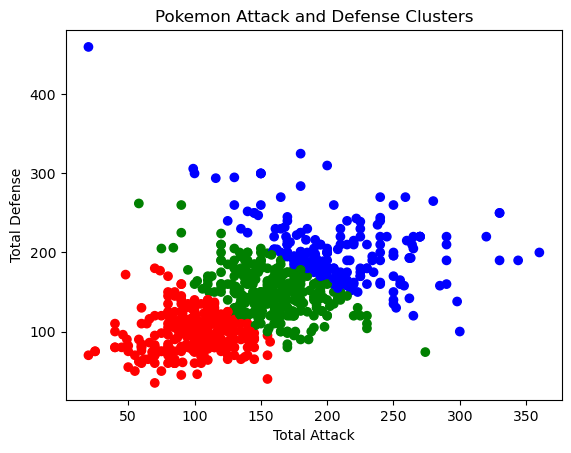

In [18]:

plt.scatter(X['total_attack'], X['total_defense'], c=colormap[labels])
plt.title('Pokemon Attack and Defense Clusters')
plt.xlabel('Total Attack')
plt.ylabel('Total Defense')

plt.show()

In the above clustering, data points labeled in red are considered "weak", green are considered "intermediate", and blue is considered "strong.

I'm going to be replaying Pokemon games over the winter break so I'm hoping this scatter will give me an indication as to what Pokemon I should catch!